In [18]:
import pandas as pd
import csv 
import json
import os
import matplotlib.pyplot as plt
import matplotlib as rc

from sklearn.preprocessing import MinMaxScaler


In [19]:
folder_name = './dataset/data1/ems/30'       # site-name

#folder_name = './dataset/sample'       # site-name
font_size = 20

target_device = ['bms','pcs--ess']
target_id = {'802':['A','AChaMax','ADisChaMax','SoC','SoH','V'], '1803':['VCell','VCellMax','VCellMin'], '113':['DCA','DCV','DCW','VAr','W']}
target_value = {'bms':['802','1803'],'pcs--ess':['113'] }

plot_title = '_'.join(target_device)+'_'+'_'.join([key for key in target_id])

In [20]:
def file_read():
    
    listOfFiles = list()
    for (dirpath, dirnames, filenames) in os.walk(folder_name):
        listOfFiles += [os.path.join(dirpath, file) for file in filenames]

    listOfFiles.sort()
        
#    print(listOfFiles)
    return listOfFiles 

In [21]:
def make_list():  # data frame column 구성에 사용
    
    tot_list = []
    for td in target_device:
        tv = target_value[td]
        tv_list=[]

        for i in tv:
            ti = target_id[i]
            #target=json_data[td].loc[i]

            ti_list = []
            for j in range(len(ti)):
                #ti_list.append(ti[j])
                ti_list.append(td+'_'+str(i)+'_'+ti[j])
            
            tv_list.extend(ti_list)        
        tot_list.extend(tv_list)
    #print(tot_list) # total_list 
    
    return tot_list    

In [22]:
def feature_ext(json_data):
    
    tar_list=[]
    
    for td in target_device:
        tv = target_value[td]
        tv_list=[]

        for i in tv:
            ti = target_id[i]
            #print(td,i)
            target=json_data[td].loc[int(i)]

            ti_list = []
            for j in range(len(ti)):
                ti_list.append(target[ti[j]])
            
            tv_list.extend(ti_list)        
        tar_list.extend(tv_list)
    #print(tar_list) # total_list 
    
    return tar_list

In [23]:
def list2pd(tar_list, df):
    pdf = pd.DataFrame(tar_list, columns = make_list()) # column head 수정
    pd_con = pd.concat([pdf, df['timestamp']], axis=1)
    
    return pd_con

In [24]:
def visualization1(tar_frame):
    tar_frame_time = tar_frame.copy()
    
#    tar_frame_time[target_value_02].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=font_size, x = "Time")
    tar_frame_time.plot(kind='line', figsize=(20,6), linewidth=3, fontsize=font_size, x = "timestamp")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=font_size)
    plt.title(plot_title, fontsize=font_size)
    plt.xlabel('Index', fontsize=font_size)
    plt.ylabel('Demand', fontsize=font_size)
    
    plt.locator_params(axis='x', nbins=4)
        
    plt.show()

In [25]:
def visualization2(tar_frame):
    min_max_scaler = MinMaxScaler()
    
    drop_frame = tar_frame.drop(['timestamp'], axis=1)
    fit_data = min_max_scaler.fit(drop_frame)

    tar_frame_norm = min_max_scaler.transform(drop_frame)
    tar_frame_norm = pd.DataFrame(tar_frame_norm, columns=drop_frame.columns, index=list(drop_frame.index.values))

    tar_frame_time = tar_frame_norm.copy()
    tar_frame_time["Time"] = tar_frame['timestamp']

#    tar_frame_time[target_value_02].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=font_size, x = "Time")
    tar_frame_time.plot(kind='line', figsize=(20,6), linewidth=3, fontsize=font_size, x = "Time")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=font_size)
    plt.title(plot_title, fontsize=font_size)
    plt.xlabel('Index', fontsize=font_size)
    plt.ylabel('Demand', fontsize=font_size)
    
    plt.locator_params(axis='x', nbins=4)

    plt.show()

In [26]:
def feature_save(tar_frame):
        
    save_fname = plot_title + '.pickle'
    
    if os.path.exists(save_fname):
        print('Warning!! The same file name exists. If you are sure you want to create a new file, delete the file first. ')
        return 
    else:
        print('A new file will be created. ')
        %time tar_frame.to_pickle(save_fname)
    

    return 

In [29]:
tar_frame = pd.DataFrame()

def main():

    global tar_frame
    
    file_list = file_read()

    for file_name in file_list : 
    
        tar_list = []
        
        data = pd.read_csv(file_name, names=['bms', 'timestamp'])
        df = pd.DataFrame(data)
        
        print(file_name)
        
        tar_list = [] 
        for json_raw in range(len(df.index)):
            try:                
                json_data = pd.read_json(df['bms'].iloc[json_raw])       # json_data : pandas format
                tar_list.append(feature_ext(json_data))
            except ValueError:
                pass
        
        tar_frame = tar_frame.append(list2pd(tar_list, df)).reset_index(drop=True)
        
    feature_save(tar_frame)
        
    visualization1(tar_frame)
    visualization2(tar_frame)        

./dataset/data1/ems/30/2018/12/backup_2018-12-17.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-18.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-19.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-20.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-21.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-22.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-23.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-24.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-25.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-26.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-27.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-28.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-29.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-30.csv
./dataset/data1/ems/30/2018/12/backup_2018-12-31.csv
./dataset/data1/ems/30/2019/01/backup_2019-01-01.csv
./dataset/data1/ems/30/2019/01/backup_2019-01-02.csv
./dataset/data1/ems/30/2019/01/backup_2019-01-03.csv
./dataset/data1/ems/30/2019/01/backup_2019-01-

./dataset/data1/ems/30/2019/05/backup_2019-05-21.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-22.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-23.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-24.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-25.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-26.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-27.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-28.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-29.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-30.csv
./dataset/data1/ems/30/2019/05/backup_2019-05-31.csv
./dataset/data1/ems/30/2019/06/backup_2019-06-01.csv
./dataset/data1/ems/30/2019/06/backup_2019-06-02.csv
./dataset/data1/ems/30/2019/06/backup_2019-06-03.csv
./dataset/data1/ems/30/2019/06/backup_2019-06-04.csv
./dataset/data1/ems/30/2019/06/backup_2019-06-05.csv
./dataset/data1/ems/30/2019/06/backup_2019-06-06.csv
./dataset/data1/ems/30/2019/06/backup_2019-06-07.csv
./dataset/data1/ems/30/2019/06/backup_2019-06-

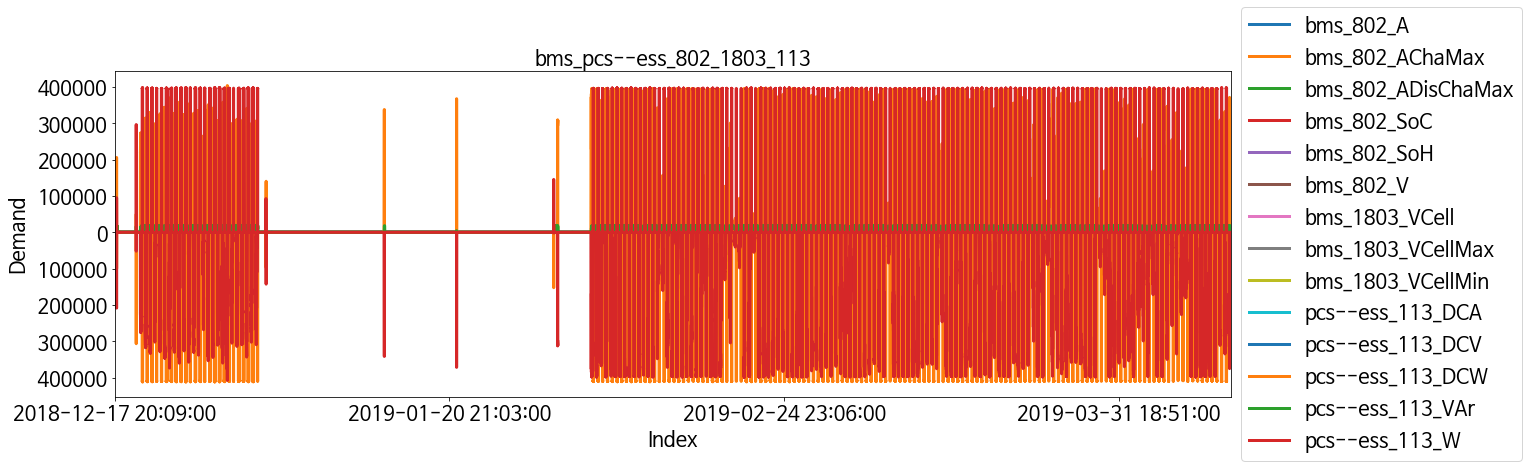

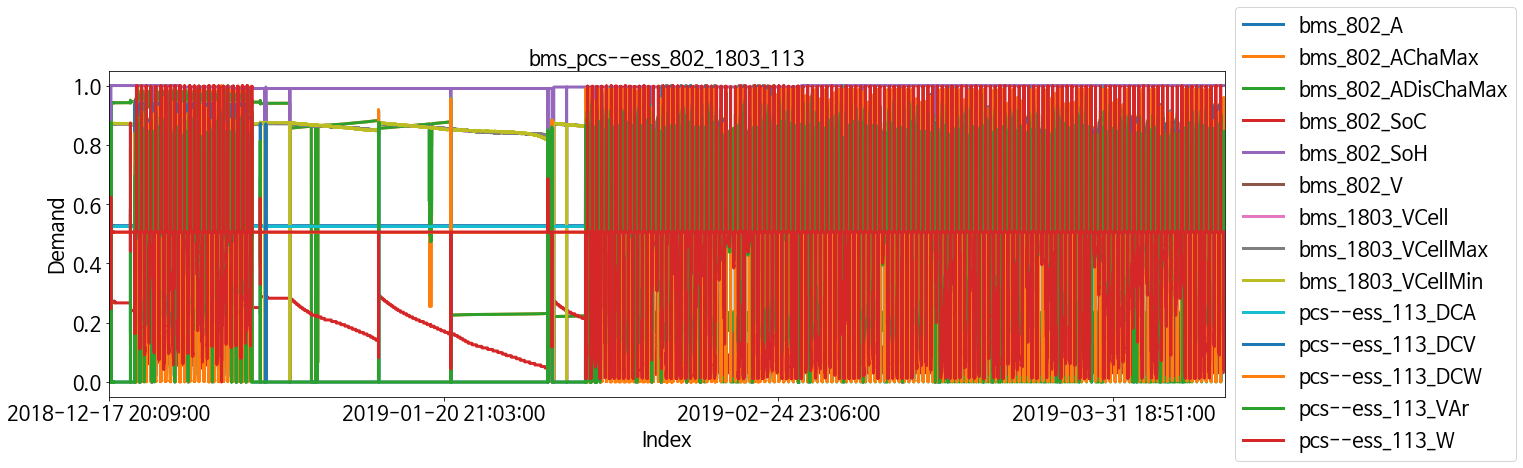

In [30]:
if __name__ == "__main__" : 
    main()    

In [31]:
tar_frame.head()

,bms_802_A,bms_802_AChaMax,bms_802_ADisChaMax,bms_802_SoC,bms_802_SoH,bms_802_V,bms_1803_VCell,bms_1803_VCellMax,bms_1803_VCellMin,pcs--ess_113_DCA,pcs--ess_113_DCV,pcs--ess_113_DCW,pcs--ess_113_VAr,pcs--ess_113_W,timestamp
0,0.0,1989.0,1989.0,26.0,100.0,857.3,3.602,3.611,3.587,0.0,0.0,0.0,0.0,0.0,2018-12-17 20:09:00
1,0.0,1989.0,1989.0,26.0,100.0,857.3,3.602,3.611,3.587,0.0,0.0,0.0,0.0,0.0,2018-12-17 20:10:00
2,0.0,1989.0,1989.0,26.0,100.0,857.3,3.602,3.611,3.587,0.0,0.0,0.0,0.0,0.0,2018-12-17 20:11:00
3,0.0,1989.0,1989.0,26.0,100.0,857.3,3.602,3.611,3.587,0.0,0.0,0.0,0.0,0.0,2018-12-17 20:12:00
4,0.0,1989.0,1989.0,26.0,100.0,857.3,3.602,3.611,3.587,0.0,0.0,0.0,0.0,0.0,2018-12-17 20:13:00
